# Bildebehandling

Det er mange måter lese inn et bilde på i Python. Det ser ut til å gå mot enighet om å bruke `imageio`-modulen, som leser inn bilder som `numpy`-arrayer. Husk også at det er mange måter å representere et bilde på, så sjekk alltid hva slags data du har fått.

(427, 640, 3) uint8 0 255


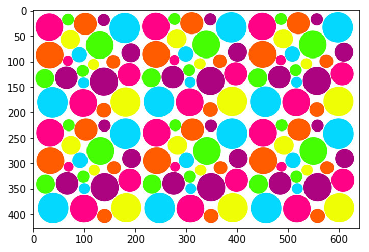

In [1]:
import imageio
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

orig_im = imageio.imread('dots.jpg')
print(orig_im.shape, orig_im.dtype, orig_im.min(), orig_im.max())

plt.imshow(orig_im)

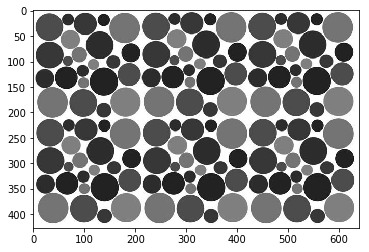

In [2]:
# Lag gråskalabilde

grey_im = orig_im.astype(float).sum(2) / (255 * 3)
plt.imshow(grey_im, plt.cm.gray)

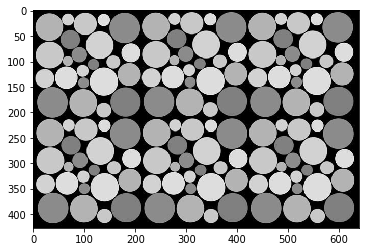

In [3]:
# Inverter bildet

plt.imshow(1 - grey_im, plt.cm.gray)

Modulen `scipy.ndimage` har mange implementert mange standard bildebehandlingsteknikker.

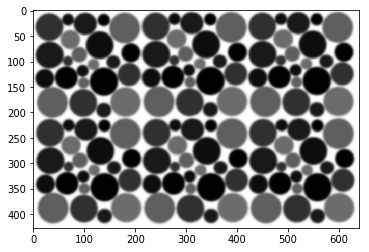

In [4]:
# Gjør uskarpt

import scipy.ndimage as nd

blur_im = nd.gaussian_filter(grey_im, 2)
plt.imshow(blur_im, plt.cm.gray)

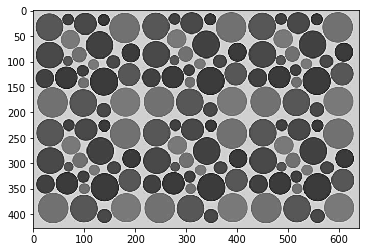

In [5]:
# Gjør skarpere

alpha = .5
skarp_im = grey_im + alpha * (grey_im - blur_im)
blur_im[blur_im > 1] = 1
blur_im[blur_im < 0] = 0
plt.imshow(skarp_im, plt.cm.gray)

Den deriverte gir endringer i bildet, altså kanter og detaljer.

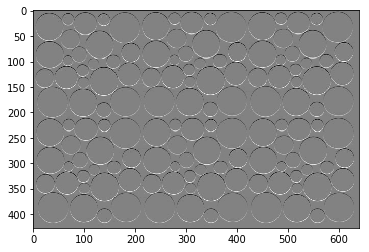

In [6]:
# Endringer i y-retning (i)

du_dy = np.zeros(grey_im.shape)
du_dy[1:-1, 1:-1] = grey_im[2:, 1:-1] - grey_im[1:-1, 1:-1]

plt.imshow(du_dy, plt.cm.gray)

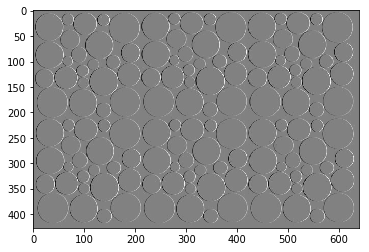

In [7]:
# Endringer i x-retning (i)

du_dx = np.zeros(grey_im.shape)
du_dx[1:-1, 1:-1] = grey_im[1:-1, 2:] - grey_im[1:-1, 1:-1]

plt.imshow(du_dx, plt.cm.gray)

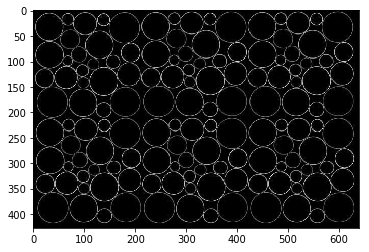

In [8]:
# Normen av gradienten

grad_norm = np.sqrt(du_dx**2 + du_dy**2)

plt.imshow(grad_norm, plt.cm.gray)